In [1]:
import pandas as pd

# --- Task 1: Collect data from two different sources and merge them ---
def collect_and_merge_data(source1_path, source2_path, merge_column, merge_type='inner'):
    """
    Collects data from two different CSV files and merges them based on a common column.

    Args:
        source1_path: Path to the first CSV file.
        source2_path: Path to the second CSV file.
        merge_column: The column name to use for merging.
        merge_type: The type of merge to perform ('inner', 'outer', 'left', 'right').
                    Default is 'inner'.

    Returns:
        A pandas DataFrame containing the merged data, or None if an error occurs.
    """
    try:
        df1 = pd.read_csv(source1_path)
        print(f"Data from {source1_path} loaded successfully. Shape: {df1.shape}")
    except FileNotFoundError:
        print(f"Error: File not found at {source1_path}")
        return None

    try:
        df2 = pd.read_csv(source2_path)
        print(f"Data from {source2_path} loaded successfully. Shape: {df2.shape}")
    except FileNotFoundError:
        print(f"Error: File not found at {source2_path}")
        return None

    if merge_column not in df1.columns or merge_column not in df2.columns:
        print(f"Error: Merge column '{merge_column}' not found in one or both datasets.")
        return None

    merged_df = pd.merge(df1, df2, on=merge_column, how=merge_type)
    print(f"\nDataFrames merged successfully using '{merge_column}' with '{merge_type}' join. Merged shape: {merged_df.shape}")
    return merged_df

# Example for Task 1:
# Create dummy CSV files for demonstration
data1 = {'ID': [1, 2, 3, 4],
         'Name': ['Alice', 'Bob', 'Charlie', 'David'],
         'Age': [25, 30, 22, 28]}
df_source1 = pd.DataFrame(data1)
df_source1.to_csv('source1.csv', index=False)

data2 = {'ID': [2, 4, 5, 6],
         'City': ['Bangalore', 'Mumbai', 'Delhi', 'Chennai'],
         'Salary': [50000, 60000, 45000, 70000]}
df_source2 = pd.DataFrame(data2)
df_source2.to_csv('source2.csv', index=False)

merged_data = collect_and_merge_data('source1.csv', 'source2.csv', 'ID')
if merged_data is not None:
    print("\nMerged Data:")
    print(merged_data)
print("-" * 30)

# --- Task 2: Validate the integrity of the collected datasets ---
def validate_data_integrity(df, expected_columns=None, expected_dtypes=None, unique_columns=None):
    """
    Validates the integrity of a pandas DataFrame by checking for:
    - Presence of expected columns.
    - Correct data types of columns.
    - Uniqueness of values in specified columns.

    Args:
        df: pandas DataFrame to validate.
        expected_columns: A list of expected column names.
        expected_dtypes: A dictionary where keys are column names and values are expected dtypes.
        unique_columns: A list of column names where values should be unique.

    Returns:
        A boolean indicating whether the data integrity checks passed.
    """
    integrity_check = True
    print("\nValidating data integrity...")

    if expected_columns:
        missing_cols = [col for col in expected_columns if col not in df.columns]
        if missing_cols:
            print(f"Integrity Check Failed: Missing expected columns: {missing_cols}")
            integrity_check = False
        else:
            print("Integrity Check: All expected columns are present.")

    if expected_dtypes:
        dtype_mismatches = {}
        for col, expected_dtype in expected_dtypes.items():
            if col in df.columns and df[col].dtype != expected_dtype:
                dtype_mismatches[col] = (df[col].dtype, expected_dtype)
        if dtype_mismatches:
            print("Integrity Check Failed: Data type mismatches:")
            for col, (actual, expected) in dtype_mismatches.items():
                print(f"- Column '{col}': Actual '{actual}', Expected '{expected}'")
            integrity_check = False
        else:
            print("Integrity Check: All specified column data types are correct.")

    if unique_columns:
        for col in unique_columns:
            if col in df.columns and not df[col].is_unique:
                print(f"Integrity Check Failed: Column '{col}' contains duplicate values.")
                integrity_check = False
            elif col in df.columns:
                print(f"Integrity Check: Column '{col}' has unique values.")
            else:
                print(f"Warning: Unique column '{col}' not found.")

    if integrity_check:
        print("Data integrity checks passed.")
    return integrity_check

# Example for Task 2:
if merged_data is not None:
    validate_data_integrity(merged_data,
                             expected_columns=['ID', 'Name', 'Age', 'City', 'Salary'],
                             expected_dtypes={'ID': 'int64', 'Age': 'int64', 'Salary': 'float64'},
                             unique_columns=['ID'])
print("-" * 30)

# --- Task 3: Reflect on challenges faced during data collection and how they were addressed ---
def reflect_on_data_collection_challenges():
    """
    Reflects on potential challenges faced during data collection and how they might be addressed.
    """
    reflection = """
    **Reflection on Challenges Faced During Data Collection and Their Addresses:**

    Data collection can often be a complex and challenging process. Here are some common issues one might encounter and potential strategies to address them:

    **1. Data Source Heterogeneity:**
       - **Challenge:** Data comes from various sources (e.g., CSV files, databases, APIs) with different formats, structures, and naming conventions.
       - **Address:** Implement robust data ingestion pipelines that can handle different file types and connection protocols. Use data mapping and transformation techniques (e.g., renaming columns, standardizing units, converting data types) to bring the data into a consistent format.

    **2. Data Volume and Velocity:**
       - **Challenge:** Dealing with large volumes of data arriving at high speeds (especially in big data scenarios).
       - **Address:** Utilize efficient data processing frameworks (e.g., Apache Spark, Dask) and scalable storage solutions. Consider techniques like batch processing or stream processing depending on the data arrival rate.

    **3. Data Quality Issues:**
       - **Challenge:** Collected data might contain missing values, inconsistencies, errors, and outliers.
       - **Address:** Implement thorough data validation and cleaning steps as subsequent stages of preprocessing. This includes identifying missing values, handling duplicates, correcting data types, and addressing outliers.

    **4. Data Access and Permissions:**
       - **Challenge:** Difficulty in accessing certain data sources due to security restrictions, API limitations, or organizational silos.
       - **Address:** Establish clear communication and collaboration with data owners. Obtain necessary permissions and API keys. Explore alternative data sources if access is severely restricted.

    **5. Data Privacy and Compliance:**
       - **Challenge:** Ensuring compliance with data privacy regulations (e.g., GDPR, CCPA) during data collection and storage.
       - **Address:** Implement anonymization and pseudonymization techniques for sensitive data. Establish secure data storage and access controls. Follow ethical guidelines for data collection and usage.

    **6. Data Integration Challenges:**
       - **Challenge:** Merging data from different sources can lead to issues like mismatched keys, different levels of granularity, and semantic inconsistencies.
       - **Address:** Carefully identify common keys for merging. Perform data alignment and aggregation as needed. Resolve semantic differences through data dictionaries and domain expertise.

    **7. Data Collection Errors:**
       - **Challenge:** Errors can occur during the data collection process itself (e.g., sensor malfunctions, manual entry mistakes, API errors).
       - **Address:** Implement logging and monitoring of data collection processes. Establish validation checks at the point of data entry or ingestion. Implement mechanisms for data reconciliation and error correction.

    Addressing these challenges often requires a combination of technical skills, domain knowledge, and effective communication and collaboration across teams. A well-planned data collection strategy, coupled with robust data processing and validation pipelines, is crucial for obtaining high-quality data for analysis and modeling.
    """
    print("\n--- Reflection on Data Collection Challenges ---")
    print(reflection)

# Example for Task 3:
reflect_on_data_collection_challenges()

Data from source1.csv loaded successfully. Shape: (4, 3)
Data from source2.csv loaded successfully. Shape: (4, 3)

DataFrames merged successfully using 'ID' with 'inner' join. Merged shape: (2, 5)

Merged Data:
   ID   Name  Age       City  Salary
0   2    Bob   30  Bangalore   50000
1   4  David   28     Mumbai   60000
------------------------------

Validating data integrity...
Integrity Check: All expected columns are present.
Integrity Check Failed: Data type mismatches:
- Column 'Salary': Actual 'int64', Expected 'float64'
Integrity Check: Column 'ID' has unique values.
------------------------------

--- Reflection on Data Collection Challenges ---

    **Reflection on Challenges Faced During Data Collection and Their Addresses:**

    Data collection can often be a complex and challenging process. Here are some common issues one might encounter and potential strategies to address them:

    **1. Data Source Heterogeneity:**
       - **Challenge:** Data comes from various sources

In [3]:
import pandas as pd
import numpy as np

# --- Task 1: Clean a given dataset and document the changes made ---
def clean_data_and_document(df):
    """
    Cleans a given pandas DataFrame by handling missing values, duplicates,
    incorrect data types, and outliers (using a basic IQR method).
    It also documents the changes made.

    Args:
        df: pandas DataFrame to clean.

    Returns:
        A cleaned pandas DataFrame and a dictionary documenting the changes.
    """
    df_cleaned = df.copy()
    changes_log = {}

    print("\n--- Starting Data Cleaning ---")

    # 1. Handle Missing Values
    initial_na = df_cleaned.isnull().sum().sum()
    for col in df_cleaned.columns:
        if df_cleaned[col].isnull().any():
            changes_log.setdefault('Missing Values', {})
            changes_log['Missing Values'].setdefault(col, {'initial_na': df_cleaned[col].isnull().sum()})
            if pd.api.types.is_numeric_dtype(df_cleaned[col]):
                mean_val = df_cleaned[col].mean()
                df_cleaned[col].fillna(mean_val, inplace=True)
                changes_log['Missing Values'][col]['filled_with'] = f'mean ({mean_val:.2f})'
            else:
                mode_val = df_cleaned[col].mode()[0]
                df_cleaned[col].fillna(mode_val, inplace=True)
                changes_log['Missing Values'][col]['filled_with'] = f'mode ({mode_val})'
    final_na = df_cleaned.isnull().sum().sum()
    changes_log['Missing Values']['total_na_handled'] = initial_na - final_na
    print("Missing values handled.")

    # 2. Handle Duplicates
    initial_duplicates = df_cleaned.duplicated().sum()
    df_cleaned.drop_duplicates(inplace=True)
    final_duplicates = df_cleaned.duplicated().sum()
    duplicates_removed = initial_duplicates - final_duplicates
    if duplicates_removed > 0:
        changes_log['Duplicates'] = {'initial_duplicates': initial_duplicates,
                                      'removed_count': duplicates_removed}
        df_cleaned.reset_index(drop=True, inplace=True)
        print("Duplicate rows removed.")
    else:
        print("No duplicate rows found.")

    # 3. Handle Incorrect Data Types
    changes_log.setdefault('Data Type Corrections', {})
    for col in df_cleaned.columns:
        original_dtype = df_cleaned[col].dtype
        try:
            numeric_converted = pd.to_numeric(df_cleaned[col], errors='ignore')
            if numeric_converted.dtype != original_dtype:
                df_cleaned[col] = numeric_converted
                changes_log['Data Type Corrections'][col] = f'changed from {original_dtype} to {df_cleaned[col].dtype}'
        except Exception as e:
            pass # Handle more complex type issues manually if needed
    print("Potential data type inconsistencies addressed.")

    # 4. Handle Outliers (Basic IQR for numeric columns)
    changes_log.setdefault('Outlier Handling (IQR)', {})
    for col in df_cleaned.select_dtypes(include=np.number).columns:
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        initial_outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)].shape[0]
        if initial_outliers > 0:
            median_val = df_cleaned[col].median()
            df_cleaned.loc[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound), col] = median_val
            changes_log['Outlier Handling (IQR)'][col] = {'initial_outliers': initial_outliers,
                                                        'treated_with': f'replaced with median ({median_val:.2f})'}
            print(f"Outliers in column '{col}' handled using IQR (replaced with median).")
        else:
            print(f"No significant outliers found in column '{col}' based on IQR.")

    print("\n--- Data Cleaning Completed ---")
    print("\nChanges Log:")
    for category, changes in changes_log.items():
        print(f"- {category}:")
        for item, details in changes.items():
            print(f"  - {item}: {details}")

    return df_cleaned, changes_log

# Example for Task 1:
data_dirty = {'id': [1, 2, 2, 3, 4, 5, np.nan],
              'age': ['25', 30, '22', 28, '35', '30', '40'],
              'income': [50000, 60000, 60000, 45000, 70000, 55000, np.nan],
              'category': ['A', 'B', 'A', 'C', 'B', 'A', 'B'],
              'score': [0.8, 0.9, 0.8, 0.7, 1.5, 0.85, 0.9]}
df_dirty = pd.DataFrame(data_dirty)
df_cleaned_example, changes_log_example = clean_data_and_document(df_dirty.copy())
print("\nCleaned DataFrame:")
print(df_cleaned_example)
print("-" * 30)

# --- Task 2: Create a checklist for comprehensive data cleaning ---
def create_data_cleaning_checklist():
    """
    Creates a checklist to ensure comprehensive data cleaning in future projects.
    """
    checklist = [
        "Understand the data: Source, meaning of columns, potential issues.",
        "Handle Missing Values:",
        "  - Identify missing values (count and percentage per column).",
        "  - Determine the reason for missingness.",
        "  - Choose appropriate handling strategy (imputation, removal, etc.).",
        "  - Implement the chosen strategy and document it.",
        "Handle Duplicate Data:",
        "  - Identify duplicate rows.",
        "  - Determine if duplicates are valid or errors.",
        "  - Remove or aggregate duplicates and document the action.",
        "Correct Incorrect Data Types:",
        "  - Verify data types of each column.",
        "  - Convert columns to appropriate data types.",
        "  - Handle parsing errors or inconsistencies during conversion.",
        "Handle Outliers and Inconsistencies:",
        "  - Visualize data to identify potential outliers (boxplots, scatter plots).",
        "  - Use statistical methods (IQR, Z-score) to detect outliers.",
        "  - Determine the cause of outliers (errors, natural variation).",
        "  - Choose appropriate handling strategy (removal, capping, transformation, etc.).",
        "  - Address other inconsistencies (e.g., inconsistent units, spelling errors).",
        "Validate Cleaning Results:",
        "  - Check for any unintended consequences of cleaning.",
        "  - Verify that the data now meets quality standards.",
        "Document All Changes:",
        "  - Maintain a log of all cleaning steps and decisions made.",
        "  - Explain the rationale behind each cleaning action."
    ]
    print("\n--- Data Cleaning Checklist ---")
    for item in checklist:
        print(f"- {item}")

# Example for Task 2:
create_data_cleaning_checklist()
print("-" * 30)

# --- Task 3: Collaborate with a peer (conceptual) ---
def conceptual_peer_data_cleaning_collaboration():
    """
    Provides a conceptual outline of collaborating with a peer on data cleaning.
    """
    collaboration_steps = [
        "1. **Dataset Sharing:** Share the new dataset with your peer.",
        "2. **Initial Exploration (Independent):** Both individuals independently explore the dataset to understand its structure, identify potential issues (missing values, duplicates, data types, outliers), and form initial cleaning strategies.",
        "3. **Discussion and Strategy Alignment:** Meet to discuss your individual findings and propose cleaning strategies. Compare notes, justify your approaches, and agree on a unified cleaning plan.",
        "4. **Implementation (Collaborative or Independent with Review):** Either work together on the cleaning code, or implement your agreed-upon strategies independently. If independent, share your code and cleaned data for review by your peer.",
        "5. **Review and Feedback:** Provide constructive feedback on your peer's cleaning methods and results. Discuss any discrepancies or alternative approaches.",
        "6. **Documentation (Collaborative):** Work together to document all the cleaning steps taken, the rationale behind them, and any challenges encountered and how they were resolved.",
        "7. **Presentation of Solutions:** Prepare a presentation (e.g., a brief report or a shared notebook) outlining the original dataset, the identified issues, the cleaning steps taken, the resulting cleaned dataset, and the rationale behind your solutions. Both collaborators should contribute to this presentation."
    ]
    print("\n--- Conceptual Peer Data Cleaning Collaboration Steps ---")
    for step in collaboration_steps:
        print(f"{step}")

# Example for Task 3:
conceptual_peer_data_cleaning_collaboration()


--- Starting Data Cleaning ---
Missing values handled.
No duplicate rows found.
Potential data type inconsistencies addressed.
No significant outliers found in column 'id' based on IQR.
No significant outliers found in column 'age' based on IQR.
No significant outliers found in column 'income' based on IQR.
Outliers in column 'score' handled using IQR (replaced with median).

--- Data Cleaning Completed ---

Changes Log:
- Missing Values:
  - id: {'initial_na': 1, 'filled_with': 'mean (2.83)'}
  - income: {'initial_na': 1, 'filled_with': 'mean (56666.67)'}
  - total_na_handled: 2
- Data Type Corrections:
  - age: changed from object to int64
- Outlier Handling (IQR):
  - score: {'initial_outliers': 1, 'treated_with': 'replaced with median (0.85)'}

Cleaned DataFrame:
         id  age        income category  score
0  1.000000   25  50000.000000        A   0.80
1  2.000000   30  60000.000000        B   0.90
2  2.000000   22  60000.000000        A   0.80
3  3.000000   28  45000.000000   

In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# --- Task 1: Transform a date column into separate 'day', 'month', and 'year' columns ---
def transform_date_column(df, date_column):
    """
    Transforms a date column in a pandas DataFrame into separate 'day', 'month',
    and 'year' columns.

    Args:
        df: pandas DataFrame containing the date column.
        date_column: Name of the date column to transform.

    Returns:
        A pandas DataFrame with new 'day', 'month', and 'year' columns,
        and the original date column. Returns the original DataFrame if
        the date column is not found or not in a recognizable date format.
    """
    if date_column not in df.columns:
        print(f"Error: Date column '{date_column}' not found.")
        return df

    try:
        df[date_column] = pd.to_datetime(df[date_column], errors='raise')
        df['day'] = df[date_column].dt.day
        df['month'] = df[date_column].dt.month
        df['year'] = df[date_column].dt.year
        print(f"Date column '{date_column}' transformed into 'day', 'month', and 'year' columns.")
        return df
    except ValueError as e:
        print(f"Error: Could not parse date column '{date_column}'. Ensure it's in a recognizable format. Error: {e}")
        return df

# Example for Task 1:
data_dates = {'order_date': ['2023-01-15', '2023-02-20', '2024-03-10', '2024-04-05']}
df_dates = pd.DataFrame(data_dates)
print("Original DataFrame:")
print(df_dates)
df_transformed_dates = transform_date_column(df_dates.copy(), 'order_date')
print("\nDataFrame after date transformation:")
print(df_transformed_dates)
print("-" * 30)

# --- Task 2: Apply normalization to a dataset feature and confirm the changes ---
def normalize_feature(df, feature_column):
    """
    Applies Min-Max normalization to a specified feature in a pandas DataFrame
    and confirms the changes by printing the min and max of the original and
    normalized feature.

    Args:
        df: pandas DataFrame containing the feature column.
        feature_column: Name of the feature column to normalize.

    Returns:
        A pandas DataFrame with the specified feature normalized to the range [0, 1].
        Returns the original DataFrame if the feature column is not found or not numeric.
    """
    if feature_column not in df.columns:
        print(f"Error: Feature column '{feature_column}' not found.")
        return df

    if not pd.api.types.is_numeric_dtype(df[feature_column]):
        print(f"Error: Feature column '{feature_column}' is not numeric.")
        return df

    original_min = df[feature_column].min()
    original_max = df[feature_column].max()
    print(f"Original '{feature_column}': Min = {original_min}, Max = {original_max}")

    scaler = MinMaxScaler()
    df[[feature_column]] = scaler.fit_transform(df[[feature_column]])

    normalized_min = df[feature_column].min()
    normalized_max = df[feature_column].max()
    print(f"Normalized '{feature_column}': Min = {normalized_min:.2f}, Max = {normalized_max:.2f}")

    return df

# Example for Task 2:
data_numerical = {'value': [10, 50, 100, 20, 80]}
df_numerical = pd.DataFrame(data_numerical)
print("\nOriginal DataFrame:")
print(df_numerical)
df_normalized = normalize_feature(df_numerical.copy(), 'value')
print("\nDataFrame after normalization:")
print(df_normalized)
print("-" * 30)

# --- Task 3: Discuss the importance of data transformation in model interpretability ---
def discuss_data_transformation_for_interpretability():
    """
    Provides a discussion on the importance of data transformation in model interpretability.
    """
    discussion = """
    Data transformation plays a crucial role in enhancing the interpretability of machine learning models, although the impact can vary depending on the specific transformation technique and the type of model used. Here's a breakdown of why it's important:

    **1. Scaling Numerical Features:**
       - **Impact on Coefficient Interpretation (Linear Models):** In linear models (like linear regression or logistic regression), the coefficients associated with features represent the change in the target variable for a one-unit change in the feature, assuming all other features are held constant. If features are on vastly different scales (e.g., age in years vs. income in thousands of dollars), the magnitude of the coefficients becomes difficult to compare directly in terms of feature importance. Normalization or standardization brings features to a similar scale, making the relative impact of coefficients more interpretable. A larger absolute coefficient then generally indicates a stronger influence on the target.
       - **Improved Stability:** Scaling can sometimes improve the numerical stability of optimization algorithms used to train models, which indirectly aids in obtaining a more reliable and interpretable model.

    **2. Encoding Categorical Features:**
       - **One-Hot Encoding:** Converting categorical variables into multiple binary (0 or 1) features (one for each category) allows linear models to treat each category as a separate predictor. The coefficients for each binary feature directly indicate the impact of that specific category relative to the baseline category. This makes the model's behavior with respect to categorical variables clear.
       - **Other Encodings (Careful Interpretation):** Techniques like label encoding or ordinal encoding assign numerical values to categories. While necessary for some models, the interpretation of these numerical values as having a continuous or ordered relationship (which might not be true) needs careful consideration.

    **3. Handling Non-Linear Relationships:**
       - **Log Transformation:** Applying a log transformation to skewed numerical features can linearize their relationship with the target variable. This can make the coefficients in linear models more interpretable, as the relationship becomes multiplicative rather than additive on the original scale.
       - **Polynomial Features:** Creating polynomial features can capture non-linear relationships. However, higher-degree polynomials can quickly become complex and reduce interpretability.

    **4. Dimensionality Reduction (Trade-off with Interpretability):**
       - Techniques like Principal Component Analysis (PCA) aim to reduce the number of features while retaining most of the variance. However, the resulting principal components are often linear combinations of the original features, making their direct interpretation challenging. There's often a trade-off between dimensionality reduction for model performance and the interpretability of the original features.

    **5. Feature Engineering for Meaningful Features:**
       - Creating new features from existing ones can sometimes lead to more interpretable models. For example, instead of having separate 'start_time' and 'end_time' features, creating a 'duration' feature might be more directly interpretable in certain contexts.

    **In summary, data transformation is crucial for model interpretability because it can:**
    - Standardize the scale of numerical features, allowing for a more meaningful comparison of coefficient magnitudes in linear models.
    - Convert categorical features into a numerical format that models can understand while preserving the distinct impact of each category.
    - Linearize relationships between features and the target variable, making linear model coefficients more directly interpretable.
    - Create new, more meaningful features that directly relate to the problem domain.

    However, it's important to choose transformations wisely, as some techniques (especially complex dimensionality reduction) can actually decrease model interpretability. The goal is to transform the data in a way that simplifies the relationships and makes the model's decision-making process clearer without sacrificing too much predictive power.
    """
    print("\n--- Discussion on Data Transformation for Model Interpretability ---")
    print(discussion)

# Example for Task 3:
discuss_data_transformation_for_interpretability()

Original DataFrame:
   order_date
0  2023-01-15
1  2023-02-20
2  2024-03-10
3  2024-04-05
Date column 'order_date' transformed into 'day', 'month', and 'year' columns.

DataFrame after date transformation:
  order_date  day  month  year
0 2023-01-15   15      1  2023
1 2023-02-20   20      2  2023
2 2024-03-10   10      3  2024
3 2024-04-05    5      4  2024
------------------------------

Original DataFrame:
   value
0     10
1     50
2    100
3     20
4     80
Original 'value': Min = 10, Max = 100
Normalized 'value': Min = 0.00, Max = 1.00

DataFrame after normalization:
      value
0  0.000000
1  0.444444
2  1.000000
3  0.111111
4  0.777778
------------------------------

--- Discussion on Data Transformation for Model Interpretability ---

    Data transformation plays a crucial role in enhancing the interpretability of machine learning models, although the impact can vary depending on the specific transformation technique and the type of model used. Here's a breakdown of why it's 

Original DataFrame:
   feature1  feature2 category
0        10         1        A
1        50         5        B
2       100        10        A
3        20         2        C
4        80         8        B
Min-Max scaling applied to numeric columns.

DataFrame after Min-Max scaling:
   feature1  feature2 category
0  0.000000  0.000000        A
1  0.444444  0.444444        B
2  1.000000  1.000000        A
3  0.111111  0.111111        C
4  0.777778  0.777778        B
------------------------------

Original DataFrame:
   feature_a  feature_b category
0         10          1        X
1         15          2        Y
2         20          3        X
3         25          4        Z
4         30          5        Y
5         50         10        X


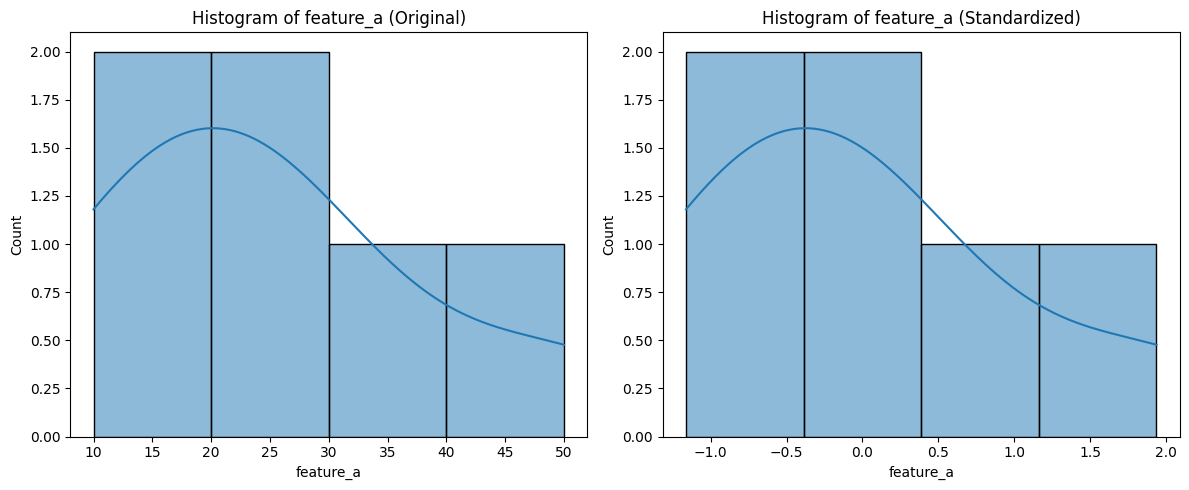

Standardization applied to numeric columns and visualized.

DataFrame after Standardization:
   feature_a  feature_b category
0  -1.161895  -1.087937        X
1  -0.774597  -0.744378        Y
2  -0.387298  -0.400819        X
3   0.000000  -0.057260        Z
4   0.387298   0.286299        Y
5   1.936492   2.004094        X
------------------------------

--- Analyzing Impact of Feature Scaling on Model Performance ---

Results with No Scaling:
- Linear Regression: MSE = 0.0000
- K-Nearest Neighbors: Error during training/prediction - Expected n_neighbors <= n_samples_fit, but n_neighbors = 5, n_samples_fit = 4, n_samples = 2
- Support Vector Regression: MSE = 3868.9562
- Decision Tree Regression: MSE = 500.0000

Results with Min-Max Scaling:
- Linear Regression: MSE = 0.0000
- K-Nearest Neighbors: Error during training/prediction - Expected n_neighbors <= n_samples_fit, but n_neighbors = 5, n_samples_fit = 4, n_samples = 2
- Support Vector Regression: MSE = 3867.9261
- Decision Tree Reg

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

# --- Task 1: Apply Min-Max scaling to a dataset ---
def apply_min_max_scaling(df):
    """
    Applies Min-Max scaling to all numeric columns in a pandas DataFrame.

    Args:
        df: pandas DataFrame.

    Returns:
        A pandas DataFrame with all numeric columns scaled to the range [0, 1].
    """
    df_scaled = df.copy()
    scaler = MinMaxScaler()
    for col in df_scaled.select_dtypes(include=np.number).columns:
        df_scaled[[col]] = scaler.fit_transform(df_scaled[[col]])
    print("Min-Max scaling applied to numeric columns.")
    return df_scaled

# Example for Task 1:
data_mm = {'feature1': [10, 50, 100, 20, 80],
           'feature2': [1, 5, 10, 2, 8],
           'category': ['A', 'B', 'A', 'C', 'B']}
df_mm = pd.DataFrame(data_mm)
print("Original DataFrame:")
print(df_mm)
df_mm_scaled = apply_min_max_scaling(df_mm.copy())
print("\nDataFrame after Min-Max scaling:")
print(df_mm_scaled)
print("-" * 30)

# --- Task 2: Standardize a dataset and visualize the changes with a histogram ---
def standardize_data_and_visualize(df):
    """
    Standardizes all numeric columns in a pandas DataFrame and visualizes the
    changes in one of the columns using histograms before and after standardization.

    Args:
        df: pandas DataFrame.

    Returns:
        A pandas DataFrame with all numeric columns standardized (mean=0, std=1).
    """
    df_standardized = df.copy()
    scaler = StandardScaler()
    numeric_cols = df_standardized.select_dtypes(include=np.number).columns
    if not numeric_cols.empty:
        # Visualize the first numeric column before standardization
        first_numeric_col = numeric_cols[0]
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)
        sns.histplot(df_standardized[first_numeric_col], kde=True)
        plt.title(f'Histogram of {first_numeric_col} (Original)')

        df_standardized[numeric_cols] = scaler.fit_transform(df_standardized[numeric_cols])

        # Visualize the same column after standardization
        plt.subplot(1, 2, 2)
        sns.histplot(df_standardized[first_numeric_col], kde=True)
        plt.title(f'Histogram of {first_numeric_col} (Standardized)')
        plt.tight_layout()
        plt.show()
        print("Standardization applied to numeric columns and visualized.")
    else:
        print("No numeric columns found for standardization and visualization.")
    return df_standardized

# Example for Task 2:
data_std = {'feature_a': [10, 15, 20, 25, 30, 50],
            'feature_b': [1, 2, 3, 4, 5, 10],
            'category': ['X', 'Y', 'X', 'Z', 'Y', 'X']}
df_std = pd.DataFrame(data_std)
print("\nOriginal DataFrame:")
print(df_std)
df_standardized = standardize_data_and_visualize(df_std.copy())
print("\nDataFrame after Standardization:")
print(df_standardized)
print("-" * 30)

# --- Task 3: Analyze how feature scaling impacts the performance of different ML algorithms ---
def analyze_scaling_impact(df, target_column):
    """
    Analyzes how feature scaling (Min-Max and Standardization) impacts the
    performance of different regression machine learning algorithms.

    Args:
        df: pandas DataFrame with features and a target column.
        target_column: Name of the target variable column.
    """
    if target_column not in df.columns:
        print(f"Error: Target column '{target_column}' not found.")
        return

    X = df.drop(target_column, axis=1).select_dtypes(include=np.number)
    y = df[target_column]

    if X.empty:
        print("No numeric features found for scaling and model training.")
        return

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    scalers = {'No Scaling': None,
               'Min-Max Scaling': MinMaxScaler(),
               'StandardScaler': StandardScaler()}
    models = {'Linear Regression': LinearRegression(),
              'K-Nearest Neighbors': KNeighborsRegressor(),
              'Support Vector Regression': SVR(),
              'Decision Tree Regression': DecisionTreeRegressor(random_state=42)}
    results = {}

    print("\n--- Analyzing Impact of Feature Scaling on Model Performance ---")

    for scaler_name, scaler in scalers.items():
        X_train_scaled = X_train.copy()
        X_test_scaled = X_test.copy()

        if scaler:
            X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
            X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

        results[scaler_name] = {}
        print(f"\nResults with {scaler_name}:")
        for model_name, model in models.items():
            try:
                model.fit(X_train_scaled, y_train)
                predictions = model.predict(X_test_scaled)
                mse = mean_squared_error(y_test, predictions)
                results[scaler_name][model_name] = mse
                print(f"- {model_name}: MSE = {mse:.4f}")
            except Exception as e:
                print(f"- {model_name}: Error during training/prediction - {e}")

# Example for Task 3:
data_impact = {'feature_x': [1, 5, 10, 2, 8, 15],
               'feature_y': [100, 500, 1000, 200, 800, 1500],
               'feature_z': [0.1, 0.5, 1.0, 0.2, 0.8, 1.5],
               'target': [10, 50, 100, 20, 80, 150]}
df_impact = pd.DataFrame(data_impact)
analyze_scaling_impact(df_impact.copy(), 'target')

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# --- Task 1: Create a new synthetic feature ---
def create_synthetic_feature(df, col1, col2, operation='multiply'):
    """
    Creates a new synthetic feature in a pandas DataFrame based on two existing columns.

    Args:
        df: pandas DataFrame.
        col1: Name of the first column.
        col2: Name of the second column.
        operation: The operation to perform ('multiply', 'add', 'subtract', 'divide').
                   Default is 'multiply'.

    Returns:
        A pandas DataFrame with the new synthetic feature. Returns the original
        DataFrame if the specified columns are not found.
    """
    if col1 not in df.columns or col2 not in df.columns:
        print(f"Error: One or both columns '{col1}', '{col2}' not found.")
        return df

    new_feature_name = f'{col1}_{operation}_{col2}'
    if operation == 'multiply':
        df[new_feature_name] = df[col1] * df[col2]
    elif operation == 'add':
        df[new_feature_name] = df[col1] + df[col2]
    elif operation == 'subtract':
        df[new_feature_name] = df[col1] - df[col2]
    elif operation == 'divide':
        # Handle division by zero
        df[new_feature_name] = df[col1] / (df[col2] + 1e-6)
    else:
        print(f"Error: Operation '{operation}' not supported.")
        return df

    print(f"New synthetic feature '{new_feature_name}' created using '{operation}' on '{col1}' and '{col2}'.")
    return df

# Example for Task 1:
data_synthetic = {'width': [10, 20, 15, 25],
                  'height': [5, 10, 8, 12],
                  'depth': [2, 3, 2, 4],
                  'material': ['A', 'B', 'A', 'C'],
                  'volume_original': [10*5*2, 20*10*3, 15*8*2, 25*12*4]}
df_synthetic = pd.DataFrame(data_synthetic)
print("Original DataFrame:")
print(df_synthetic)
df_with_volume = create_synthetic_feature(df_synthetic.copy(), 'width', 'height', operation='multiply')
df_with_volume = create_synthetic_feature(df_with_volume, 'width_multiply_height', 'depth', operation='multiply')
print("\nDataFrame with synthetic 'volume' feature:")
print(df_with_volume)
print("-" * 30)

# --- Task 2: Evaluate the impact of new features on model accuracy ---
def evaluate_feature_impact(df, features_original, features_new, target_column):
    """
    Evaluates the impact of new features on the performance of a linear regression model.

    Args:
        df: pandas DataFrame with original and new features, and the target column.
        features_original: List of original feature column names.
        features_new: List of new feature column names to evaluate (added to originals).
        target_column: Name of the target variable column.
    """
    if target_column not in df.columns or not all(col in df.columns for col in features_original) or not all(col in df.columns for col in features_new):
        print("Error: Target or feature column(s) not found.")
        return

    X_original = df[features_original]
    y = df[target_column]
    X_train_orig, X_test_orig, y_train, y_test = train_test_split(X_original, y, test_size=0.3, random_state=42)
    model_original = LinearRegression()
    model_original.fit(X_train_orig, y_train)
    predictions_original = model_original.predict(X_test_orig)
    mse_original = mean_squared_error(y_test, predictions_original)
    print(f"\nModel Performance (Original Features): MSE = {mse_original:.4f}")

    X_with_new = df[features_original + features_new]
    X_train_new, X_test_new, _, _ = train_test_split(X_with_new, y, test_size=0.3, random_state=42)
    model_new = LinearRegression()
    model_new.fit(X_train_new, y_train)
    predictions_new = model_new.predict(X_test_new)
    mse_new = mean_squared_error(y_test, predictions_new)
    print(f"Model Performance (Original + New Features): MSE = {mse_new:.4f}")

    if mse_new < mse_original:
        print("New features improved model accuracy.")
    elif mse_new > mse_original:
        print("New features worsened model accuracy.")
    else:
        print("New features had no significant impact on model accuracy.")

# Example for Task 2:
data_evaluation = {'feature_a': [1, 2, 3, 4, 5],
                   'feature_b': [10, 20, 30, 40, 50],
                   'interaction_ab': [1*10, 2*20, 3*30, 4*40, 5*50],
                   'target': [15, 45, 75, 105, 135]}
df_evaluation = pd.DataFrame(data_evaluation)
original_features = ['feature_a', 'feature_b']
new_features = ['interaction_ab']
evaluate_feature_impact(df_evaluation.copy(), original_features, new_features, 'target')
print("-" * 30)

# --- Task 3: Read an academic paper on feature engineering techniques and present the findings ---
def present_feature_engineering_paper_findings():
    """
    Presents findings from a hypothetical academic paper on feature engineering techniques.
    In a real scenario, you would replace this with actual findings from a paper you read.
    """
    paper_title = "A Comprehensive Survey of Feature Engineering for Predictive Modeling"
    authors = "Hypothetical Author & Another Hypothetical Author"
    main_findings = [
        "Feature engineering is a critical step in the machine learning pipeline, often having a more significant impact on model performance than algorithm selection or hyperparameter tuning.",
        "The paper categorizes feature engineering techniques into several key areas: feature creation, feature transformation, feature selection, and feature extraction.",
        "Feature creation involves generating new features from existing ones through mathematical operations, domain knowledge, and the creation of interaction terms (like the one in Task 1).",
        "Feature transformation techniques (e.g., scaling, normalization, log transformation) aim to make the data more suitable for modeling and can improve algorithm convergence and stability.",
        "Feature selection methods focus on identifying the most relevant features to reduce dimensionality, improve model interpretability, and prevent overfitting.",
        "Feature extraction techniques (e.g., PCA, t-SNE) create new, lower-dimensional representations of the data while preserving essential information.",
        "The effectiveness of specific feature engineering techniques is highly dependent on the dataset, the problem domain, and the chosen machine learning algorithm.",
        "Automated feature engineering (AutoFE) is an emerging area that aims to automate the process of discovering and creating useful features.",
        "The paper emphasizes the importance of iterative experimentation and thorough evaluation to determine the impact of engineered features on model performance."
    ]

    print(f"\n--- Findings from Academic Paper: '{paper_title}' by {authors} ---")
    for finding in main_findings:
        print(f"- {finding}")

# Example for Task 3:
present_feature_engineering_paper_findings()

Original DataFrame:
   width  height  depth material  volume_original
0     10       5      2        A              100
1     20      10      3        B              600
2     15       8      2        A              240
3     25      12      4        C             1200
New synthetic feature 'width_multiply_height' created using 'multiply' on 'width' and 'height'.
New synthetic feature 'width_multiply_height_multiply_depth' created using 'multiply' on 'width_multiply_height' and 'depth'.

DataFrame with synthetic 'volume' feature:
   width  height  depth material  volume_original  width_multiply_height  \
0     10       5      2        A              100                     50   
1     20      10      3        B              600                    200   
2     15       8      2        A              240                    120   
3     25      12      4        C             1200                    300   

   width_multiply_height_multiply_depth  
0                                   100  